# Бинарная классификация

Для уверенной работы с данными вам пригодится знание:

*   Pandas - библиотеки для работы с таблицами
*   Numpy - библиотеки для быстрых и эффективных вычислений
*   Sklearn - библиотеки с основными инструментами ML

Посмотрим, как пользоваться логистической регрессией в python для решения задач классификации.

Для примера будем пользоваться встроенным в sklearn датасетом для решения задачи бинарной классификации — load_breast_cancer.

В датасете содержатся числовые признаки женщин (результаты исследований, биологические характеристики), а целевая переменная (1 или 0) показывает, больна ли пациентка раком груди или нет.

### Наши цели на сегодня:

*  Обучить логистическую регрессию на представленном датасете.
*  Оценить качество полученной модели и сравнить с методом ближайших соседей.

## Часть 1. Загрузка данных и обучение модели.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [11]:
data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target

X.shape, y.shape

((569, 30), (569,))

Посмотрим на данные.

In [12]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: target, dtype: int64

Проверим, сбалансирована ли выборка.

In [14]:
len(y[y==0]), len(y[y==1])

(212, 357)

Баланса классов нет, но и перекос не такой сильный.

Для решения этой задачи будем использовать **линейную модель классификации — логистическую регрессию**.

Для начала разобъём данные на train и test (test — 20% от всех данных).

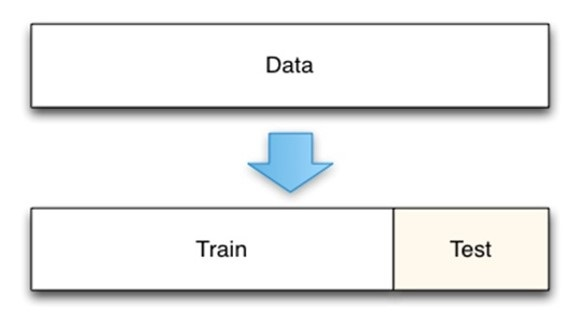

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

Обучим логистическую регрессию на train и сделаем предсказание на новых для нее данных (test).

In [16]:
model = LogisticRegression()
model.fit(Xtrain, ytrain)

LogisticRegression()

In [18]:
pred_test = model.predict(Xtest)

Посмотрим на предсказания модели и оценим долю правильных ответов.

In [19]:
pred_test[:5]

array([1, 0, 1, 0, 0])

In [24]:
accuracy_score(ytest, pred_test)

0.9473684210526315

Получили модель отличного качества! Но мы помним про дисбаланс классов, поэтому попозже надо посчитать и другие метрики.

Посмотрим на веса модели.

In [20]:
model.coef_, model.intercept_

(array([[ 1.08259268,  0.41952239,  0.10088551, -0.00701272, -0.03522821,
         -0.18990394, -0.27260677, -0.11151707, -0.05322313, -0.00899401,
          0.06490775,  0.2494881 ,  0.22926647, -0.0770703 , -0.00413608,
         -0.04382094, -0.06580635, -0.01644778, -0.01670053, -0.00400291,
          1.24979596, -0.42344221, -0.19186566, -0.01819877, -0.06050389,
         -0.55240119, -0.72366023, -0.21329646, -0.15098547, -0.04450024]]),
 array([0.20742633]))

In [23]:
import pandas as pd

coef_table = pd.DataFrame(list(X.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",model.coef_.transpose())

coef_table

,0,Coefs
0,mean radius,1.082593
1,mean texture,0.419522
2,mean perimeter,0.100886
3,mean area,-0.007013
4,mean smoothness,-0.035228
5,mean compactness,-0.189904
6,mean concavity,-0.272607
7,mean concave points,-0.111517
8,mean symmetry,-0.053223
9,mean fractal dimension,-0.008994


Если вес у признака положительный, то признак вносит положительный вклад в ответ, то есть чем больше значение признака, тем больше это дает вклад в положительный класс объекта и наоборот.

## Часть 2. Вероятности.

Также мы можем посмотреть на предсказанные логистической регрессией вероятности.

In [27]:
probs = model.predict_proba(Xtest)

probs[:5]

array([[0.36444107, 0.63555893],
       [0.63761254, 0.36238746],
       [0.00414364, 0.99585636],
       [0.9986771 , 0.0013229 ],
       [0.72547783, 0.27452217]])

Для каждого объекта модель выдаёт две вероятности: первое число — вероятность класса 0, вторая — вероятность класса 1 (можно проверить, что сумма вероятностей равна 1).

## Метод ближайших соседей

Существует еще один простой метод для решения задач классификации - метод ближайших соседей.

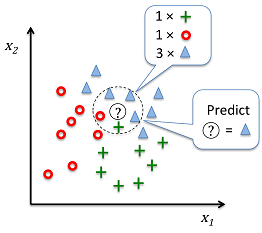

Попробуем применить метод ближайших соседей для решения поставленной задачи.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model3 = KNeighborsClassifier()

In [ ]:
model3.fit(Xtrain, ytrain)

pred_test3 = model3.predict(Xtest)

accuracy_score(ytest, pred_test3)

0.9385964912280702

## Анализ матрицы ошибок и ROC-AUC.

In [30]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [26]:
confusion_matrix(ytest, pred_test)

array([[38,  4],
       [ 2, 70]])

In [31]:
score = roc_auc_score(ytest, probs[:,1])
score

0.9880952380952381

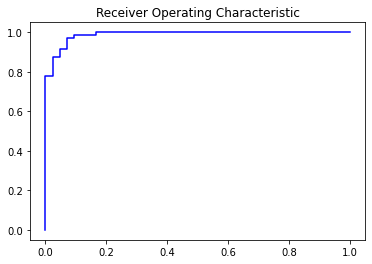

In [33]:
import matplotlib.pyplot as plt

fpr, tpr, threshold = roc_curve(ytest, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % score)